<a href="https://colab.research.google.com/github/Msuban1/Msuban1.github.io/blob/main/WEEK_1_Project_(Exploring_dataset).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
!pip install --upgrade gspread gspread-dataframe google-auth

# **Data Exploration**

**Subtask 1:**

Explore the cleaned sales data to understand its characteristics.


**Reasoning**:
Explore the sales data by examining data types, missing values, descriptive statistics, unique values in categorical columns, and the overall shape of the DataFrame. Also, check for correlations between numerical variables.



In [53]:
import pandas as pd
import gspread
from google.colab import auth
from google.auth import default
from gspread_dataframe import get_as_dataframe, set_with_dataframe

# Authenticate
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)


In [60]:
# Load the first worksheet (your cleaned data)
worksheet = spreadsheet.get_worksheet(0)
sales_df = get_as_dataframe(worksheet, dtype=str)
sales_df.dropna(how='all', inplace=True)

# Convert numeric columns
sales_df['Price'] = pd.to_numeric(sales_df['Price'], errors='coerce')
sales_df['Quantity'] = pd.to_numeric(sales_df['Quantity'], errors='coerce')
sales_df['Total_Amount'] = pd.to_numeric(sales_df['Total_Amount'], errors='coerce')

# Create or open the Exploratory Data Analysis sheet
try:
    new_sheet = spreadsheet.add_worksheet(title="Exploratory Data Analysis", rows="100", cols="20")
    print("✅ New sheet 'Exploratory Data Analysis' created.")
except:
    new_sheet = spreadsheet.worksheet("Exploratory Data Analysis")
    print("ℹ️ Using existing sheet 'Exploratory Data Analysis'.")

# Get first 5 rows
sample_data = sales_df.head()

ℹ️ Using existing sheet 'Exploratory Data Analysis'.


In [61]:
# Create column summary
column_info = pd.DataFrame({
    "Column Name": sales_df.columns,
    "Data Type": sales_df.dtypes.astype(str),
    "Missing Values": sales_df.isnull().sum().values,
    "Unique Values": [sales_df[col].nunique() for col in sales_df.columns]
})

# Add space between tables
empty_row = pd.DataFrame([[]])

# Combine everything
combined_df = pd.concat([sample_data.reset_index(drop=True), empty_row, column_info], ignore_index=True)

# Write to Google Sheet
set_with_dataframe(new_sheet, combined_df)
print("✅ Data written to 'Exploratory Data Analysis' tab.")

✅ Data written to 'Exploratory Data Analysis' tab.


### **Subtask 2:**

**Identify Key Trends and Patterns**

Starting by calculating summary statistics (e.g., mean,
median, standard deviation for numerical columns). Seek any obvious patterns in sales, seasonality, or product trends.

## Data visualization

### Subtask:
Visualize the distribution of key features in the sales data.


**Reasoning**:
Visualize the distribution of key features using histograms and bar charts.



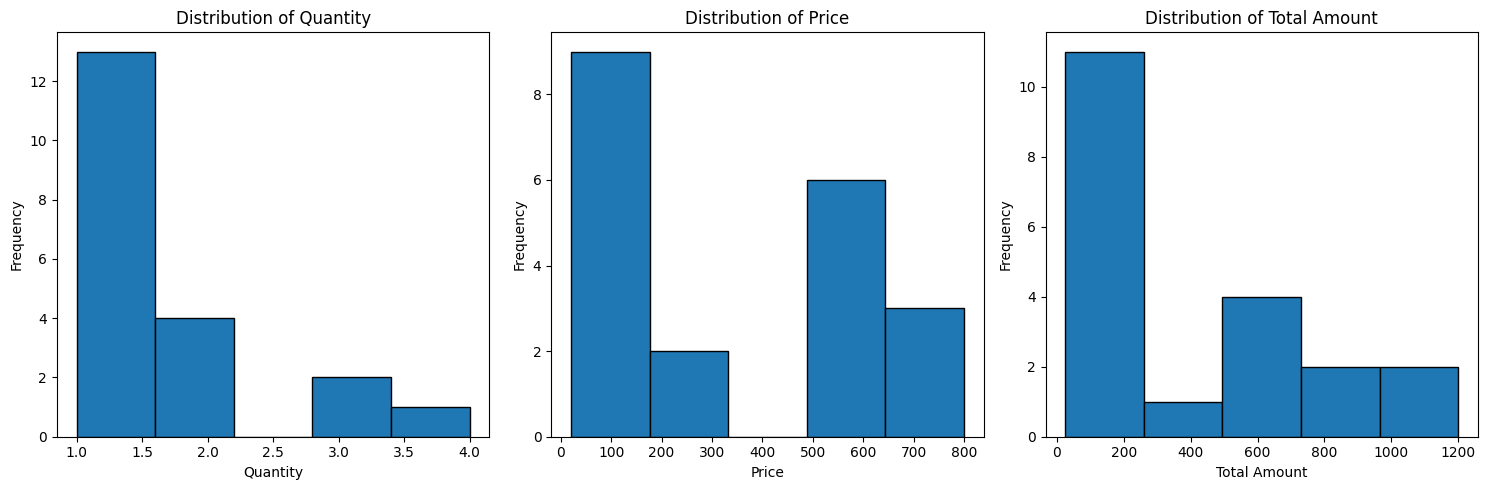

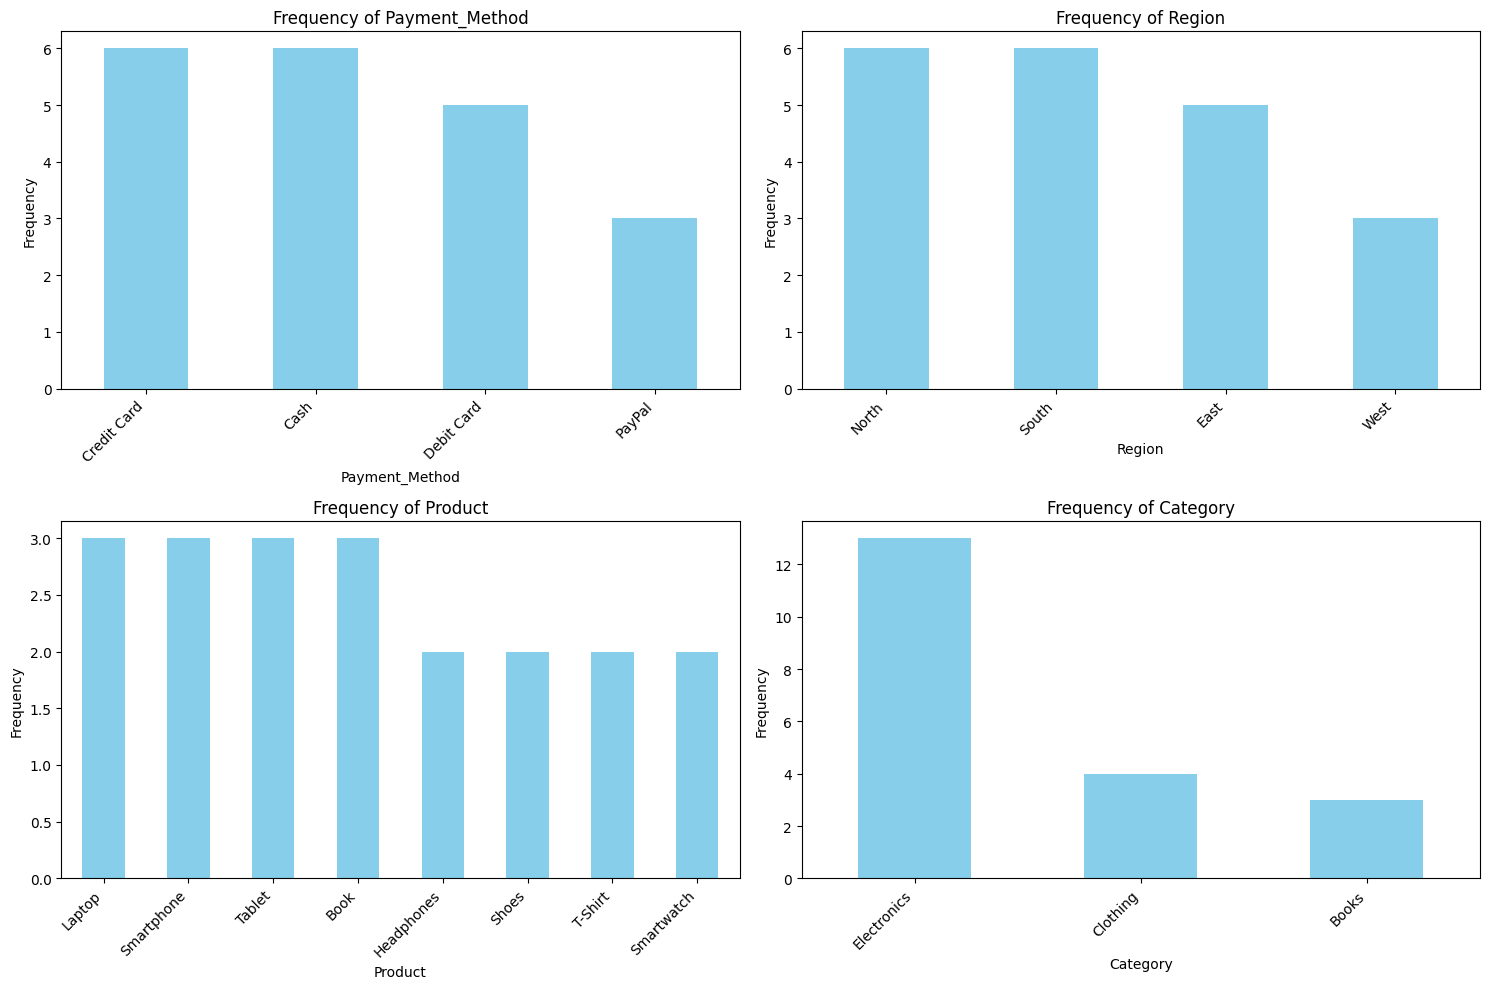

In [58]:
import matplotlib.pyplot as plt

# Histograms for numerical features
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(sales_df['Quantity'], bins=5, edgecolor='black')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.title('Distribution of Quantity')

plt.subplot(1, 3, 2)
plt.hist(sales_df['Price'], bins=5, edgecolor='black')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Price')

plt.subplot(1, 3, 3)
plt.hist(sales_df['Total_Amount'].dropna(), bins=5, edgecolor='black') # Handle missing values
plt.xlabel('Total Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Total Amount')

plt.tight_layout()
plt.show()


# Bar charts for categorical features
categorical_features = ['Payment_Method', 'Region', 'Product', 'Category']
plt.figure(figsize=(15, 10))

for i, feature in enumerate(categorical_features):
    plt.subplot(2, 2, i + 1)
    sales_df[feature].value_counts().plot(kind='bar', color='skyblue')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.title(f'Frequency of {feature}')
    plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

## Data analysis

### Subtask:
Perform detailed data analysis on the sales data.


**Reasoning**:
Calculate descriptive statistics for numerical features, analyze categorical feature frequencies, explore correlations between numerical features, and investigate relationships between numerical and categorical features. Handle the missing 'Total_Amount' value before calculations.



In [59]:
# Calculate descriptive statistics for numerical features
numerical_features = ['Quantity', 'Price', 'Total_Amount']
sales_df[numerical_features].describe()

# Handle missing value in 'Total_Amount' (using imputation for demonstration)
sales_df['Total_Amount'] = sales_df['Total_Amount'].fillna(sales_df['Total_Amount'].mean())

# Recalculate descriptive statistics after imputation
print(sales_df[numerical_features].describe())

# Analyze frequency distribution of categorical features
categorical_features = ['Payment_Method', 'Region', 'Product', 'Category']
for col in categorical_features:
    frequencies = sales_df[col].value_counts(normalize=True) * 100
    print(f"\nFrequency distribution for {col}:\n{frequencies}")

# Explore correlations between numerical features
correlation_matrix = sales_df[['Quantity', 'Price', 'Total_Amount']].corr()
print(f"\nCorrelation Matrix:\n{correlation_matrix}")

# Investigate relationships between numerical and categorical features
for col in categorical_features:
    print(f"\nAverage price and total amount by {col}:")
    print(sales_df.groupby(col)[['Price', 'Total_Amount']].mean())

        Quantity       Price  Total_Amount
count  20.000000   20.000000     20.000000
mean    1.550000  325.500000    375.263158
std     0.887041  302.484884    378.690520
min     1.000000   20.000000     25.000000
25%     1.000000   43.750000     78.750000
50%     1.000000  200.000000    200.000000
75%     2.000000  600.000000    525.000000
max     4.000000  800.000000   1200.000000

Frequency distribution for Payment_Method:
Payment_Method
Credit Card    30.0
Cash           30.0
Debit Card     25.0
PayPal         15.0
Name: proportion, dtype: float64

Frequency distribution for Region:
Region
North    30.0
South    30.0
East     25.0
West     15.0
Name: proportion, dtype: float64

Frequency distribution for Product:
Product
Laptop        15.0
Smartphone    15.0
Tablet        15.0
Book          15.0
Headphones    10.0
Shoes         10.0
T-Shirt       10.0
Smartwatch    10.0
Name: proportion, dtype: float64

Frequency distribution for Category:
Category
Electronics    65.0
Clothing    

## Summary:

### Q&A
There were no explicit questions in the task description. However, the analysis implicitly answers questions about the dataset's characteristics, distributions, and relationships between variables.


### Data Analysis Key Findings
* **Missing Data:** A missing value was found in the `Total_Amount` column, which was subsequently imputed using the mean value.
* **Data Types:** The 'Date' column was identified as an object data type and should be converted to datetime.
* **Correlation:** A strong positive correlation (0.83) exists between 'Price' and 'Total\_Amount', while a weak negative correlation (-0.42) exists between 'Quantity' and 'Price'.  The correlation between 'Quantity' and 'Total\_Amount' was weak (-0.17).
* **Categorical Distributions:** The analysis revealed the frequency distribution of each categorical feature (Payment\_Method, Region, Product, Category). For instance, the analysis of average price and total amount by product showed that laptops and smartphones have higher average prices and total amounts compared to books and t-shirts.


### Insights or Next Steps
* Convert the 'Date' column to datetime format for time-series analysis.
* Further investigate the missing `Total_Amount` value and consider alternative imputation methods or removal if appropriate.  The impact of the imputation on subsequent analysis should be considered.
* Explore the relationship between sales and different product categories or regions in more depth.
